# Building a Neural Netwwork using Numpy and Pandas

In [49]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
# Load data
data = pd.read_csv('/content/sample_data/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [51]:
# Split dataset
data_dev = data[0:1000].T
Y_dev = data_dev[0].astype(int)
X_dev = data_dev[1:n] / 255.

data_train = data[1000:m].T
Y_train = data_train[0].astype(int)
X_train = data_train[1:n] / 255.

In [52]:
# Initialize parameters
def init_params():
    W1 = np.random.randn(10, 784) * 0.01
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

In [53]:
# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = W2.dot(A1) + b2
    exp_scores = np.exp(Z2 - np.max(Z2, axis=0, keepdims=True))  # numerical stability
    A2 = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)
    return Z1, A1, Z2, A2

In [54]:
# One-hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

In [55]:
# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [56]:
# Parameter update
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [57]:
# Predictions and accuracy
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

In [58]:
# Training loop
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 50 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {i}: Accuracy {accuracy:.4f}")
    return W1, b1, W2, b2

In [59]:
# Train model
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, alpha=0.1, iterations=300)

Iteration 0: Accuracy 0.1551
Iteration 50: Accuracy 0.4821
Iteration 100: Accuracy 0.5669
Iteration 150: Accuracy 0.7407
Iteration 200: Accuracy 0.8082
Iteration 250: Accuracy 0.8453


In [60]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


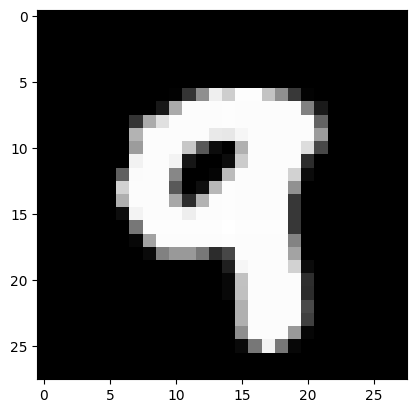

Prediction:  [4]
Label:  4


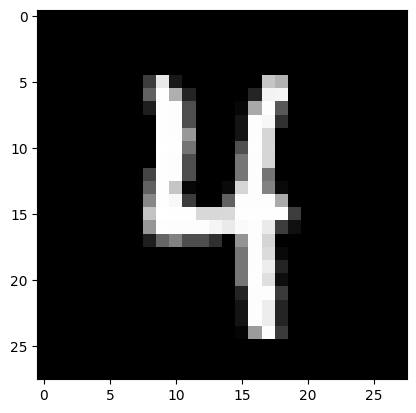

Prediction:  [5]
Label:  9


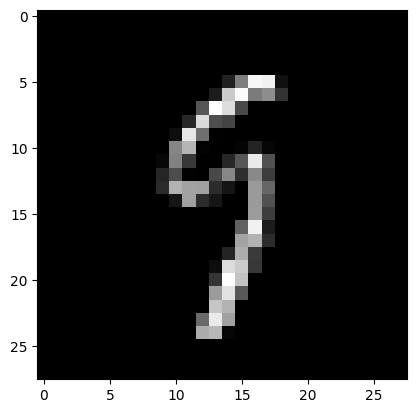

Prediction:  [8]
Label:  8


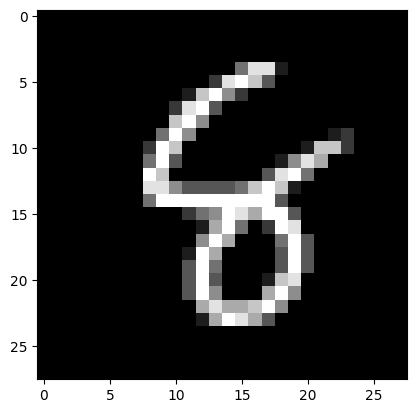

In [61]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [62]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Accuracy: ",int(get_accuracy(dev_predictions, Y_dev) * 100),"%",sep='')

Accuracy: 86%
